For AstrinQ1012 Vs WT

In [25]:
# import necessary modules
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import skimage.filters as filters
import skimage.color as color
from PIL import Image
import pandas as pd
from skimage.util import img_as_float
from skimage.color import label2rgb, rgb2gray,gray2rgb
from skimage import segmentation,morphology,feature,measure
from scipy import ndimage as ndi
import glob
from natsort import natsorted 
import os
import glob

In [38]:
# import function file
%run functions.ipynb

In [39]:
# path to the local folder for the notebooks
BASE_DIR="/Users/Trupti/01-LIDo/02-VijiProject/ImageAnalysis/" 
#path to the image folder.
IMAGE_DIR=BASE_DIR + "data/AMovie/"
CSV_DIR = BASE_DIR + "AnalysisMethods/AnalysisResults/AMovie/csvs/"

#### A List for the Images Folders

In [40]:
wt=[]
control=[]
wt_path = IMAGE_DIR + 'wt'
control_path=IMAGE_DIR + 'control'

for folder in glob.glob(wt_path + '/*'):
    wt.append(wt_path + '/' + folder.split('/')[-1].split('.')[0])
for folder in glob.glob(control_path + '/*'):
    control.append(control_path + '/' + folder.split('/')[-1].split('.')[0])     

### Create The DataFrames and CSVs
#### With background correction

In [41]:
# For WildType

for i in range(len(wt)):
    df_green,df_red=prewitt_method2_BG(wt[i])
    df_bg=pd.merge(df_green, df_red,  how='outer',on=['label','area','eccentricity','perimeter'],suffixes=('_green', '_red'))
    df_bg['intensity_ratio'] = df_bg['mean_intensity_green']/df_bg['mean_intensity_red']
    print("Datapoints before removing the outliers : " ,len(df_bg))
    
    directory=wt[i].split('/')[-1].split('.')[0] # to create a folder per experiment to save csvs
    path = CSV_DIR + 'wt/' + directory
    try:
        os.makedirs(path)
    except FileExistsError:
    # directory already exists
        pass
    
    df_bg.to_csv(path +  '/'+'ParticleMeasurements-WithBGCorrection'+'.csv') # write to csv before removing the outliers
    df_bg=outliers(df_bg)
    df_bg.to_csv(path +  '/'+'ParticleMeasurements-OutlierRemoved-WithBGCorrection'+'.csv') # write to csv after removing the outliers
    print("Datapoints after removing the outliers: " ,len(df_bg))



Datapoints before removing the outliers :  461
Datapoints after removing the outliers:  435
Datapoints before removing the outliers :  460
Datapoints after removing the outliers:  433
Datapoints before removing the outliers :  704
Datapoints after removing the outliers:  664


In [42]:
# For Control


for i in range(len(control)):
    df_green,df_red=prewitt_method2_BG(control[i])
    df_bg=pd.merge(df_green, df_red,  how='outer',on=['label','area','eccentricity','perimeter'],suffixes=('_green', '_red'))
    df_bg['intensity_ratio'] = df_bg['mean_intensity_green']/df_bg['mean_intensity_red']
    print("Datapoints before removing the outliers : " ,len(df_bg))
    
    directory=control[i].split('/')[-1].split('.')[0] # to create a folder per experiment to save csvs
    path = CSV_DIR + 'control/' + directory
    try:
        os.makedirs(path)
    except FileExistsError:
    # directory already exists
        pass
    
    df_bg.to_csv(path +  '/'+'ParticleMeasurements-WithBGCorrection'+'.csv') # write to csv before removing the outliers
    df_bg=outliers(df_bg)
    df_bg.to_csv(path +  '/'+'ParticleMeasurements-OutlierRemoved-WithBGCorrection'+'.csv') # write to csv after removing the outliers
    print("Datapoints after removing the outliers: " ,len(df_bg))



Datapoints before removing the outliers :  495
Datapoints after removing the outliers:  457
Datapoints before removing the outliers :  316
Datapoints after removing the outliers:  307
Datapoints before removing the outliers :  596
Datapoints after removing the outliers:  571


### Without Background Correction

In [43]:
# For WildType

for i in range(len(wt)):
    df_green,df_red=prewitt_method2_noBG(wt[i])
    df_bg=pd.merge(df_green, df_red,  how='outer',on=['label','area','eccentricity','perimeter'],suffixes=('_green', '_red'))
    df_bg['intensity_ratio'] = df_bg['mean_intensity_green']/df_bg['mean_intensity_red']
    print("Datapoints before removing the outliers : " ,len(df_bg))
    
    directory=wt[i].split('/')[-1].split('.')[0] # to create a folder per experiment to save csvs
    path = CSV_DIR + 'wt/' + directory
    try:
        os.makedirs(path)
    except FileExistsError:
    # directory already exists
        pass
    
    df_bg.to_csv(path +  '/'+'ParticleMeasurements-WithOutBGCorrection'+'.csv') # write to csv before removing the outliers
    df_bg=outliers(df_bg)
    df_bg.to_csv(path +  '/'+'ParticleMeasurements-OutlierRemoved-WithOutBGCorrection'+'.csv') # write to csv after removing the outliers
    print("Datapoints after removing the outliers: " ,len(df_bg))

Datapoints before removing the outliers :  461
Datapoints after removing the outliers:  461
Datapoints before removing the outliers :  460
Datapoints after removing the outliers:  451
Datapoints before removing the outliers :  704
Datapoints after removing the outliers:  698


In [44]:
# For Control


for i in range(len(control)):
    df_green,df_red=prewitt_method2_noBG(control[i])
    df_bg=pd.merge(df_green, df_red,  how='outer',on=['label','area','eccentricity','perimeter'],suffixes=('_green', '_red'))
    df_bg['intensity_ratio'] = df_bg['mean_intensity_green']/df_bg['mean_intensity_red']
    print("Datapoints before removing the outliers : " ,len(df_bg))
    
    directory=control[i].split('/')[-1].split('.')[0] # to create a folder per experiment to save csvs
    path = CSV_DIR + 'control/' + directory
    try:
        os.makedirs(path)
    except FileExistsError:
    # directory already exists
        pass
    
    df_bg.to_csv(path +  '/'+'ParticleMeasurements-WithOutBGCorrection'+'.csv') # write to csv before removing the outliers
    df_bg=outliers(df_bg)
    df_bg.to_csv(path +  '/'+'ParticleMeasurements-OutlierRemoved-WithOutBGCorrection'+'.csv') # write to csv after removing the outliers
    print("Datapoints after removing the outliers: " ,len(df_bg))

Datapoints before removing the outliers :  495
Datapoints after removing the outliers:  485
Datapoints before removing the outliers :  316
Datapoints after removing the outliers:  312
Datapoints before removing the outliers :  596
Datapoints after removing the outliers:  591


### Plots

In [16]:
#plots


import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.5, rc={"lines.linewidth":2.5})
# path to save graphs
GRAPH_DIR=BASE_DIR + "AnalysisMethods/AnalysisResults/AMovie/graphs/"

In [17]:
# plot graphs 
# WildType Vs Control
# The paths are for the generated csv files
wt_csv=[]
control_csv=[]
wt_path = CSV_DIR + 'wt'
control_path=CSV_DIR + 'control'

for folder in glob.glob(wt_path + '/*'):
    wt_csv.append(wt_path + '/' + folder.split('/')[-1].split('.')[0])
    
for folder in glob.glob(control_path + '/*'):
    control_csv.append(control_path + '/' + folder.split('/')[-1].split('.')[0])  


In [19]:
# read both csvs to a dataframe
cell_count=0
df_graph=pd.DataFrame()
for i in range(len(control_csv)): # change this number depending upon the number of folders
    df_wt_bg=pd.read_csv(wt_csv[i] +'/'+'ParticleMeasurements-OutlierRemoved-WithBGCorrection.csv')
    df_control_bg=pd.read_csv(control_csv[i]+'/'+'ParticleMeasurements-OutlierRemoved-WithBGCorrection.csv')
    
    df_temp_wt=pd.DataFrame(data=(df_wt_bg['intensity_ratio']))
    df_temp_wt['condition']='wt'
    df_temp_wt['cell']= 'cell_%d'%i
    df_temp_control=pd.DataFrame(data=(df_control_bg['intensity_ratio']))
    df_temp_control['condition']='control'
    df_temp_control['cell']= 'cell_%d'%i
    df_graph=pd.concat([df_graph,df_temp_wt,df_temp_control],ignore_index=True)
    cell_count+=1

In [20]:
# count the number of KTs in wt and control
wt = df_graph[df_graph['condition']=='wt'].shape[0]
control = df_graph[df_graph['condition']=='control'].shape[0]

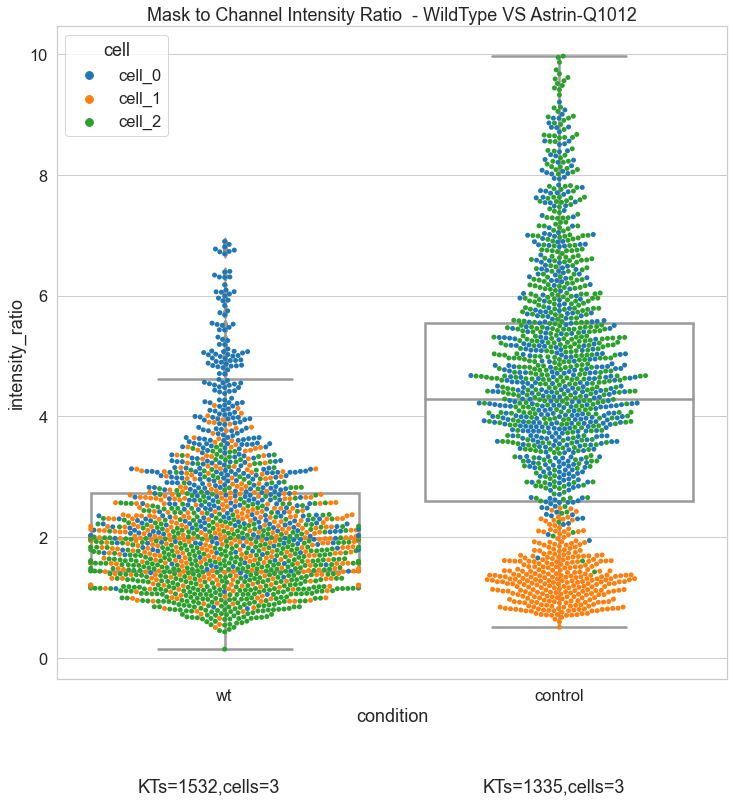

In [22]:
title="Mask to Channel Intensity Ratio  - WildType VS Astrin-Q1012"
plt.figure(figsize=(12,12))
sns_plot=sns.boxplot(x='condition',y='intensity_ratio',color='white',data=df_graph).set_title(title)
sns_plot = sns.swarmplot(s=5,x='condition',y='intensity_ratio',hue='cell',data=df_graph) # change the value for s if all points are not placed in the graph
plt.figtext(0.3, 0, 'KTs=%s,cells=%s'%(wt,cell_count), horizontalalignment='center',verticalalignment='center')
plt.figtext(0.7, 0, 'KTs=%s,cells=%s'%(control,cell_count), horizontalalignment='center',verticalalignment='center')

sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
plt.show()

In [23]:
#generate a dataframe with inverse for channel to mask ratio
df_inverse= df_graph.copy()
df_inverse['intensity_ratio'] = df_graph['intensity_ratio'].apply(lambda x: 1/ x)

/Users/Trupti/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 27.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


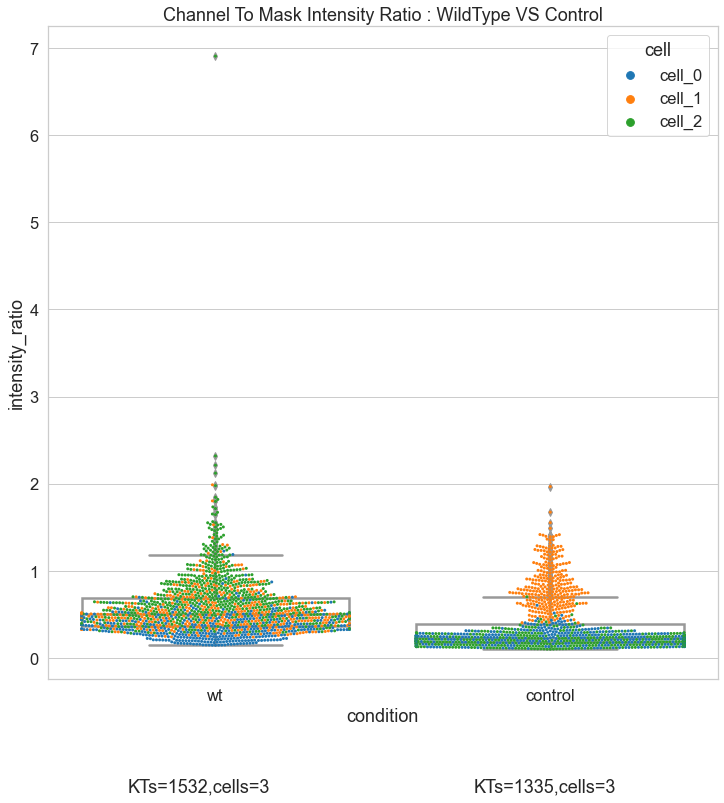

In [24]:
# channel to mask


title="Channel To Mask Intensity Ratio : WildType VS Control"
plt.figure(figsize=(12,12))
sns_plot=sns.boxplot(x='condition',y='intensity_ratio',color='white',data=df_inverse).set_title(title)
sns_plot = sns.swarmplot(s=3,x='condition',y='intensity_ratio',hue='cell',data=df_inverse)
plt.figtext(0.3, 0, 'KTs=%s,cells=%s'%(wt,cell_count), horizontalalignment='center',verticalalignment='center')
plt.figtext(0.7, 0, 'KTs=%s,cells=%s'%(control,cell_count), horizontalalignment='center',verticalalignment='center')


sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
plt.show()
                                                    

